<a href="https://colab.research.google.com/github/jutourru/portfolio/blob/main/Bootcamp_Data_Analytics_2022_Desafio_1_Entendendo_o_consumidor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #[**CHALLENGE**] Probabilidade e Amostragem

**Objetivo:** Como a equipe de marketing de uma empresa de produtos de beleza populares suspeita que houve uma mudança no perfil de compra dos consumidores da marca durante o périodo pandêmico, 
será realizado uma análise nos dados de compra  antes e depois da pandemia.  

No caso dessa hipótese se confirmar, será detalhado  os novos interesses de produto e também qual a nova persona da marca. Dessa forma, a equipe de marketing digital poderá projetar ações ainda mais assertivas.  

In [ ]:
#Bootcamp Data Analytics 2022 Desafio 1 Entendendo o consumidor
#bibliotecas usadas:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

O estudo se inicia com a análise do dataset do arquivo desafio-01-consumidor.csv. Ele destaca 6 variáveis: Id do cliente, idade, renda, produto, região e a classificação, sendo (1) pré-pandemia e (0) pós-pandemia. 

In [ ]:
consumidor = pd.read_csv('/content/desafio-01-consumidor.csv')
consumidor

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0
199,XXXXXXX50,43,10930,antissinais,Norte,0
200,XXXXXXX65,48,10246,perfume,Nordeste,0
201,XXXXXXX61,47,12337,batom,Sudeste,0


In [ ]:
consumidor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


In [ ]:
consumidor['pre-pandemia'].value_counts()

0    102
1    101
Name: pre-pandemia, dtype: int64

### #No período (0) pós-pandemia foi realizado apenas uma venda a mais que no período (1) pré-pandemia. Logo, pode-se considerar que não houve oscilações no volume de vendas. Porém, será necessário analisar quais produtos foram vendidos antes e depois da pandemia para analisar o comportamento desses consumidores, conforme sua região, sua faixa etária e renda. 





In [ ]:
periodo = {0 : 'pós-pandemia', 1: 'pré-pandemia'}
frequencia = pd.crosstab(consumidor['regiao-BR'], 
                         consumidor['pre-pandemia'])
frequencia.rename(columns = periodo, inplace = True)
frequencia 


pre-pandemia,pós-pandemia,pré-pandemia
regiao-BR,,
Centro-Oeste,8,17
Nordeste,25,26
Norte,9,8
Sudeste,18,21
Sul,42,29


Note que enquanto a região Sul apontou um aumento acentuado no consumo de produtos, as regiões Sudeste, Nordeste e Norte demonstraram pequenas oscilações. Já o Centro-oeste teve uma queda no consumo dos produtos. 

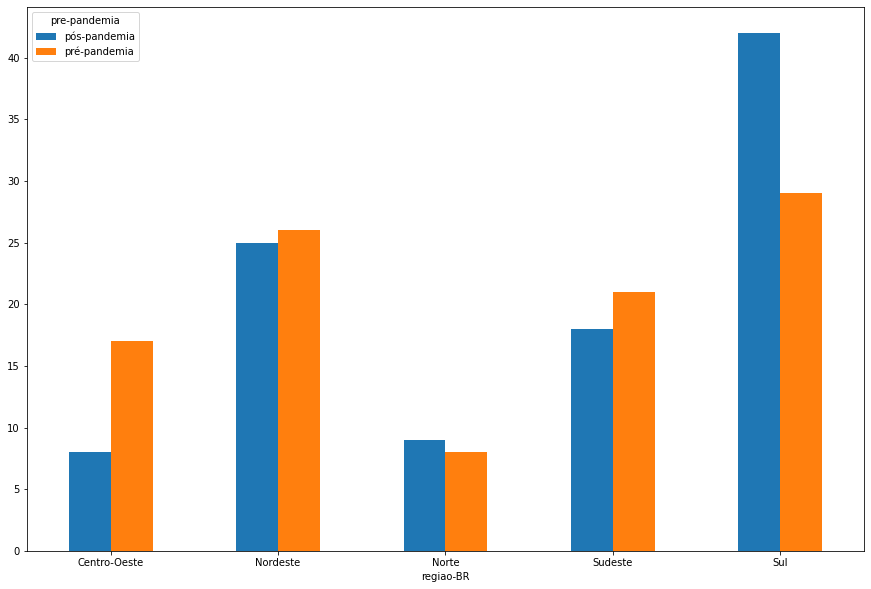

In [ ]:
frequencia.plot.bar(figsize = (15,10), rot=0)
plt.show()

In [ ]:
periodo = {0 : 'pós-pandemia', 1: 'pré-pandemia'}
frequencia = pd.crosstab(consumidor['produto'], 
                         consumidor['pre-pandemia'])
frequencia.rename(columns = periodo, inplace = True)
frequencia 

pre-pandemia,pós-pandemia,pré-pandemia
produto,,
antissinais,20,9
base,4,3
batom,15,61
desodorante,46,20
perfume,8,4
sombra,9,4


Extremamente revelador é avaliar a queda significativa da compra de batom no pós-pandemia. Provalmente, em decorrência do uso da mascará que cobria a boca das consumidoras e também das medidas sanitárias que orientavam para evitar produtos na boca, pelo risco do contágio do corona.
Os dados também evidenciam que o uso do desodorante e dos cremes antissinais aumentaram, um dado interessante que será mais explorado a seguir. 

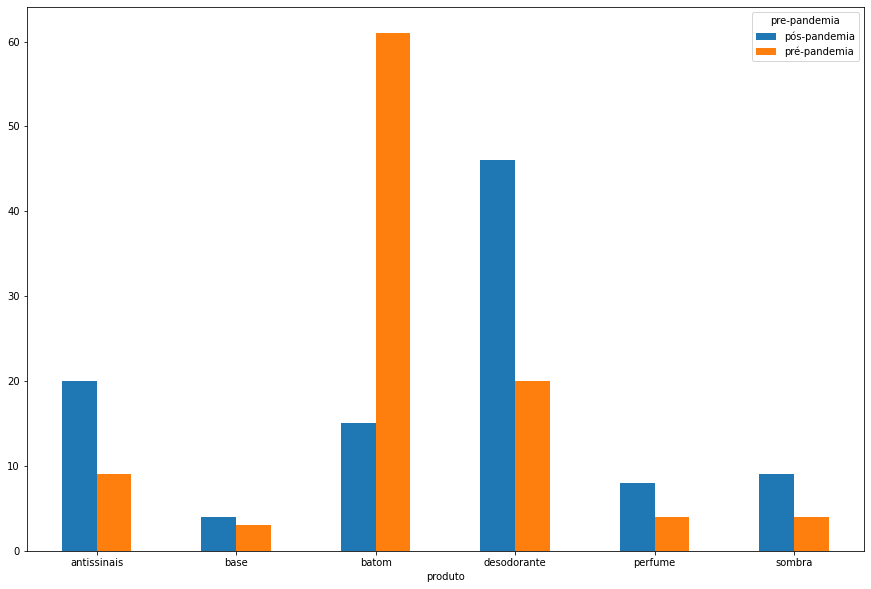

In [ ]:
frequencia.plot.bar(figsize = (15,10), rot=0)
plt.show()

Conforme o gráfico, fica nítido a mudança no comportamento do consumidor. Os batons saem de cena e os desodorantes entram de forma triunfal.   

#Medidas de Tendência Central

In [ ]:
consumidor.describe()

,idade,renda,pre-pandemia
count,203.000000,203.000000,203.000000
mean,42.403941,11586.364532,0.497537
std,14.400715,6288.016708,0.501230
min,15.000000,110.000000,0.000000
25%,31.000000,6705.000000,0.000000
50%,41.000000,11145.000000,0.000000
75%,53.000000,15590.500000,1.000000
max,80.000000,30000.000000,1.000000


In [ ]:
consumidor_prepandemia = consumidor[consumidor['pre-pandemia']==1]
consumidor_prepandemia 



,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
...,...,...,...,...,...,...
96,XXXXXXX80,32,6251,antissinais,Norte,1
97,XXXXXXX92,43,2616,batom,Sul,1
98,XXXXXXX65,54,2324,antissinais,Norte,1
99,XXXXXXX79,61,12278,base,Centro-Oeste,1


In [ ]:
consumidor_prepandemia.describe()

,idade,renda,pre-pandemia
count,101.000000,101.000000,101.0
mean,39.881188,9180.643564,1.0
std,15.016183,6007.677720,0.0
min,16.000000,110.000000,1.0
25%,28.000000,4867.000000,1.0
50%,37.000000,7488.000000,1.0
75%,48.000000,13226.000000,1.0
max,80.000000,24090.000000,1.0


In [ ]:
consumidor_pospandemia = consumidor[consumidor['pre-pandemia']==0]
consumidor_pospandemia 

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
101,XXXXXXX67,35,25959,batom,Sul,0
102,XXXXXXX60,35,1995,desodorante,Nordeste,0
103,XXXXXXX48,53,23314,antissinais,Centro-Oeste,0
104,XXXXXXX67,44,16693,antissinais,Centro-Oeste,0
105,XXXXXXX59,37,14631,base,Nordeste,0
...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0
199,XXXXXXX50,43,10930,antissinais,Norte,0
200,XXXXXXX65,48,10246,perfume,Nordeste,0
201,XXXXXXX61,47,12337,batom,Sudeste,0


In [ ]:
consumidor_pospandemia.describe()

,idade,renda,pre-pandemia
count,102.000000,102.000000,102.0
mean,44.901961,13968.500000,0.0
std,13.373174,5641.384444,0.0
min,15.000000,1995.000000,0.0
25%,35.250000,10255.000000,0.0
50%,46.000000,13380.500000,0.0
75%,54.750000,16870.250000,0.0
max,77.000000,30000.000000,0.0


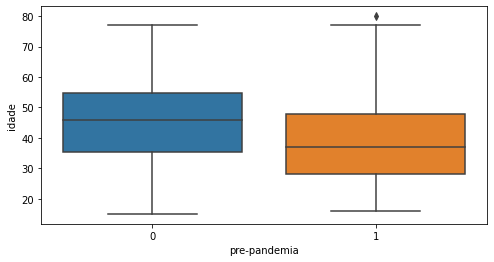

In [ ]:
ax = sns.boxplot(x='pre-pandemia', y = 'idade', data = consumidor)
ax.figure.set_size_inches(8, 4)
plt.xticks(rotation = 0);

Esse plot é muito determinante. Diante desse dado, podemos considerar que a marca teve uma mudança de persona. Se antes da pandemia, ela atendia ao público na faixa dos 35 anos, no pós-pandemia seu público se voltou para a faixa dos 45 anos. 

Uma faixa etária que aprecia o auto cuidado. Logo, investe na compra dos produtos antisinais e também dá atenção especial ao desodorante, que remete limpeza e zelo.  


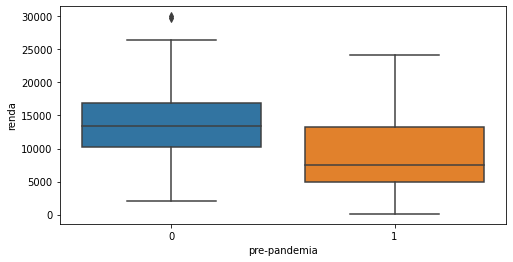

In [ ]:
ax = sns.boxplot(x='pre-pandemia', y = 'renda', data = consumidor)
ax.figure.set_size_inches(8, 4)
plt.xticks(rotation = 0);

Interessante a alteração no poder aquisitivo dos novos consumidores da marca.

In [ ]:
consumidor.columns

Index(['id_cliente', 'idade', 'renda', 'produto', 'regiao-BR', 'pre-pandemia'], dtype='object')

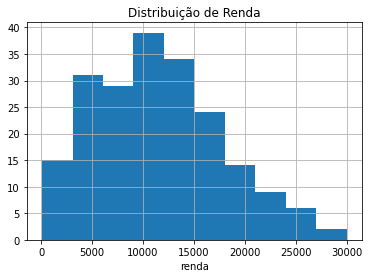

In [ ]:
consumidor['renda'].hist()
plt.xlabel('renda') 
plt.title('Distribuição de Renda');



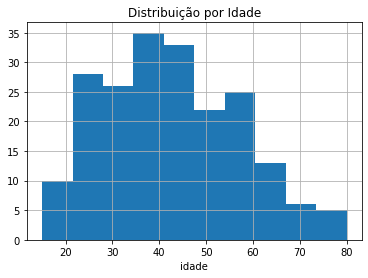

In [ ]:
consumidor['idade'].hist()
plt.xlabel('idade') 
plt.title('Distribuição por Idade');

Conclusão: diante da análise dos dados, podemos avaliar que a marca teve uma mudança no seu publico-alvo. Agora, seu consumidor se enquadra na faixa dos 45 anos, tem maior poder aquisitivo, está em mais concentração na região Sul e ao que tudo indica tem muito interesse pela compra de desodorante e cremes com enfoque em antisinais. 

A equipe de Marketing poderá avaliar ações com conteúdo e abordagem para um público mais maduro. 
